### 두개의 데이터 셋을 합치고 처리하기

### 데이터 참고 사이트 
* our world in data
  * https://ourworldindata.org/covid-vaccinations
* bloomberg.com
  * https://www.bloomberg.com/graphics/covid-vaccine-tracker-global-distribution/
  
* 코로나 19(COVID-19) 실시간 상황판
  * https://coronaboard.kr/

In [1]:
from IPython.display import display, Image
import os, warnings
import re
warnings.filterwarnings(action='ignore')

### 01 파일 불러오기

In [2]:
os.listdir(os.getcwd())

['.git',
 '.idea',
 '.ipynb_checkpoints',
 '01_dataScraping_corona01_today.ipynb',
 '01_dataScraping_corona02.ipynb',
 '01_dataScraping_corona02.py',
 '02_dataScraping_bloomberg.ipynb',
 '02_dataScraping_bloomberg.py',
 '03_corona_vaccine_merge.ipynb',
 '04_analysis_corr.ipynb',
 '05_people_request.ipynb',
 '2021_0911_12',
 '2021_0911_13',
 '2021_0911_13.zip',
 '2021_0920_00',
 'chromedriver_91.exe',
 'data',
 'html_pdf',
 'README.md',
 'WEB_sel_project11_naverNews_corona_0731.ipynb']

In [3]:
import pandas as pd

# excel 데이터 셋도 pd.read_excel로 가져올 수 있음.
corona = pd.read_csv("./data/2021-09-20_corona.csv")
vaccine = pd.read_csv("./data/20210920_00_vaccine_bloomberg.csv")
country_code = pd.read_excel("./data/country.xlsx")

corona.shape, vaccine.shape, country_code.shape

((222, 12), (207, 6), (227, 4))

In [4]:
corona.head()

,국가,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일
0,미국🇺🇸,24327\n-523,1.6,75.8,129632,331002651,42908619,41814.0,691992,430.0,32508846.0,25620.0
1,인도🇮🇳,8944,1.3,97.7,24277,1380004385,33483170,32085.0,445248,349.0,32715105.0,43938.0
2,브라질🇧🇷,8318,2.8,95.5,99924,212559417,21239783,9458.0,590786,239.0,20280294.0,NaN
3,영국🇬🇧,1020,1.8,80.5,109444,67886011,7429746,29007.0,135203,56.0,5981684.0,22993.0
4,러시아🇷🇺,2300,2.7,89.3,49986,145934462,7294672,19744.0,198996,778.0,6510674.0,11992.0


In [5]:
vaccine.head()

,country,Doses_administered,percent_of_people:,1_percent,2_percent,Daily_rate_of_doses
0,Global Total,5.952519e+09,-999.0,-999.0,-999.0,33135900.0
1,Mainland China,2.174043e+09,77.6,78.5,72.3,4494714.0
2,India,8.083893e+08,29.6,43.7,14.5,9236028.0
3,EU,5.550877e+08,62.5,66.6,62.7,1039973.0
4,U.S.,3.855860e+08,60.2,63.8,54.6,763444.0


In [6]:
country_code.head()

,국문(코로나보드),영문(블룸버그),나라,비고_뜻
0,가나,Ghana,NaN,NaN
1,가봉,Gabon,NaN,NaN
2,가이아나,Guyana,NaN,NaN
3,감비아,Gambia,NaN,NaN
4,과들루프,NaN,프랑스,Guadeloupe


### 코로나에 나라명이 있으면 해당되는 열을 붙여라

In [7]:
corona['국가'].str.extract('([ㄱ-ㅣ가-힣]+)')

,0
0,미국
1,인도
2,브라질
3,영국
4,러시아
...,...
217,마셜
218,바누아투
219,사모아
220,세인트헬레나


In [8]:
corona['hangul_code'] = corona['국가'].str.extract('([ㄱ-ㅣ가-힣]+)', expand=False)
corona.columns

Index(['국가', '위중증', '치명(%)', '완치(%)', '발생률', '인구수', '확진자_합계', '확진자1일', '사망자합계',
       '사망자1일', '완치합계', '완치1일', 'hangul_code'],
      dtype='object')

In [9]:
col = ['국가', 'hangul_code', '위중증', '치명(%)', '완치(%)', '발생률', '인구수', '확진자_합계', '확진자1일', '사망자합계',
       '사망자1일', '완치합계', '완치1일']
new_corona = corona[col].copy()
new_corona



,국가,hangul_code,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일
0,미국🇺🇸,미국,24327\n-523,1.6,75.8,129632,331002651,42908619,41814.0,691992,430.0,32508846.0,25620.0
1,인도🇮🇳,인도,8944,1.3,97.7,24277,1380004385,33483170,32085.0,445248,349.0,32715105.0,43938.0
2,브라질🇧🇷,브라질,8318,2.8,95.5,99924,212559417,21239783,9458.0,590786,239.0,20280294.0,NaN
3,영국🇬🇧,영국,1020,1.8,80.5,109444,67886011,7429746,29007.0,135203,56.0,5981684.0,22993.0
4,러시아🇷🇺,러시아,2300,2.7,89.3,49986,145934462,7294672,19744.0,198996,778.0,6510674.0,11992.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,마셜 제도🇲🇭,마셜,NaN,-,100.0,68,59190,4,NaN,0,NaN,4.0,NaN
218,바누아투🇻🇺,바누아투,NaN,25,75.0,13,307145,4,NaN,1,NaN,3.0,NaN
219,사모아🇼🇸,사모아,NaN,-,100.0,15,198414,3,NaN,0,NaN,3.0,NaN
220,세인트헬레나🇸🇭,세인트헬레나,NaN,-,100.0,329,6077,2,NaN,0,NaN,2.0,NaN


### 두 데이터 셋 연결

In [10]:
new_corona.head()

,국가,hangul_code,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일
0,미국🇺🇸,미국,24327\n-523,1.6,75.8,129632,331002651,42908619,41814.0,691992,430.0,32508846.0,25620.0
1,인도🇮🇳,인도,8944,1.3,97.7,24277,1380004385,33483170,32085.0,445248,349.0,32715105.0,43938.0
2,브라질🇧🇷,브라질,8318,2.8,95.5,99924,212559417,21239783,9458.0,590786,239.0,20280294.0,NaN
3,영국🇬🇧,영국,1020,1.8,80.5,109444,67886011,7429746,29007.0,135203,56.0,5981684.0,22993.0
4,러시아🇷🇺,러시아,2300,2.7,89.3,49986,145934462,7294672,19744.0,198996,778.0,6510674.0,11992.0


In [11]:
country_code.head()

,국문(코로나보드),영문(블룸버그),나라,비고_뜻
0,가나,Ghana,NaN,NaN
1,가봉,Gabon,NaN,NaN
2,가이아나,Guyana,NaN,NaN
3,감비아,Gambia,NaN,NaN
4,과들루프,NaN,프랑스,Guadeloupe


In [12]:
country_code.columns = ['han_code', 'eng_code', 'country', 'etc']
country_code.head()

,han_code,eng_code,country,etc
0,가나,Ghana,NaN,NaN
1,가봉,Gabon,NaN,NaN
2,가이아나,Guyana,NaN,NaN
3,감비아,Gambia,NaN,NaN
4,과들루프,NaN,프랑스,Guadeloupe


In [13]:
df_corona = new_corona.merge(country_code, left_on='hangul_code', 
                             right_on='han_code')
df_corona.head()

,국가,hangul_code,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,han_code,eng_code,country,etc
0,미국🇺🇸,미국,24327\n-523,1.6,75.8,129632,331002651,42908619,41814.0,691992,430.0,32508846.0,25620.0,미국,U.S.,NaN,NaN
1,인도🇮🇳,인도,8944,1.3,97.7,24277,1380004385,33483170,32085.0,445248,349.0,32715105.0,43938.0,인도,India,NaN,NaN
2,브라질🇧🇷,브라질,8318,2.8,95.5,99924,212559417,21239783,9458.0,590786,239.0,20280294.0,NaN,브라질,Brazil,NaN,NaN
3,영국🇬🇧,영국,1020,1.8,80.5,109444,67886011,7429746,29007.0,135203,56.0,5981684.0,22993.0,영국,U.K.,NaN,NaN
4,러시아🇷🇺,러시아,2300,2.7,89.3,49986,145934462,7294672,19744.0,198996,778.0,6510674.0,11992.0,러시아,Russia,NaN,NaN


In [14]:
df_corona.drop(['국가', 'han_code', 'country', 'etc'], axis=1, inplace=True)
df_corona.head()

,hangul_code,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,eng_code
0,미국,24327\n-523,1.6,75.8,129632,331002651,42908619,41814.0,691992,430.0,32508846.0,25620.0,U.S.
1,인도,8944,1.3,97.7,24277,1380004385,33483170,32085.0,445248,349.0,32715105.0,43938.0,India
2,브라질,8318,2.8,95.5,99924,212559417,21239783,9458.0,590786,239.0,20280294.0,NaN,Brazil
3,영국,1020,1.8,80.5,109444,67886011,7429746,29007.0,135203,56.0,5981684.0,22993.0,U.K.
4,러시아,2300,2.7,89.3,49986,145934462,7294672,19744.0,198996,778.0,6510674.0,11992.0,Russia


In [15]:
vaccine.head()

,country,Doses_administered,percent_of_people:,1_percent,2_percent,Daily_rate_of_doses
0,Global Total,5.952519e+09,-999.0,-999.0,-999.0,33135900.0
1,Mainland China,2.174043e+09,77.6,78.5,72.3,4494714.0
2,India,8.083893e+08,29.6,43.7,14.5,9236028.0
3,EU,5.550877e+08,62.5,66.6,62.7,1039973.0
4,U.S.,3.855860e+08,60.2,63.8,54.6,763444.0


In [16]:
df_corona_all = df_corona.merge(vaccine, left_on='eng_code', right_on='country')
df_corona_all.head()

,hangul_code,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,eng_code,country,Doses_administered,percent_of_people:,1_percent,2_percent,Daily_rate_of_doses
0,미국,24327\n-523,1.6,75.8,129632,331002651,42908619,41814.0,691992,430.0,32508846.0,25620.0,U.S.,U.S.,385586020.0,60.2,63.8,54.6,763444.0
1,인도,8944,1.3,97.7,24277,1380004385,33483170,32085.0,445248,349.0,32715105.0,43938.0,India,India,808389300.0,29.6,43.7,14.5,9236028.0
2,브라질,8318,2.8,95.5,99924,212559417,21239783,9458.0,590786,239.0,20280294.0,NaN,Brazil,Brazil,222322660.0,53.9,69.4,37.8,1721039.0
3,영국,1020,1.8,80.5,109444,67886011,7429746,29007.0,135203,56.0,5981684.0,22993.0,U.K.,U.K.,93002090.0,69.6,72.7,66.5,83947.0
4,러시아,2300,2.7,89.3,49986,145934462,7294672,19744.0,198996,778.0,6510674.0,11992.0,Russia,Russia,87810616.0,29.9,31.9,27.6,354749.0


In [17]:
df_corona_all.drop(['country'], axis=1, inplace=True)
df_corona_all

,hangul_code,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,eng_code,Doses_administered,percent_of_people:,1_percent,2_percent,Daily_rate_of_doses
0,미국,24327\n-523,1.6,75.8,129632,331002651,42908619,41814.0,691992,430.0,32508846.0,25620.0,U.S.,385586020.0,60.2,63.8,54.6,763444.0
1,인도,8944,1.3,97.7,24277,1380004385,33483170,32085.0,445248,349.0,32715105.0,43938.0,India,808389300.0,29.6,43.7,14.5,9236028.0
2,브라질,8318,2.8,95.5,99924,212559417,21239783,9458.0,590786,239.0,20280294.0,NaN,Brazil,222322660.0,53.9,69.4,37.8,1721039.0
3,영국,1020,1.8,80.5,109444,67886011,7429746,29007.0,135203,56.0,5981684.0,22993.0,U.K.,93002090.0,69.6,72.7,66.5,83947.0
4,러시아,2300,2.7,89.3,49986,145934462,7294672,19744.0,198996,778.0,6510674.0,11992.0,Russia,87810616.0,29.9,31.9,27.6,354749.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,NaN,-,100.0,97,649335,63,NaN,0,NaN,63.0,NaN,Macau,633071.0,46.5,49.8,43.6,2787.0
174,몬트세랫,NaN,3.0,90.9,6611,4992,33,NaN,1,NaN,30.0,NaN,Montserrat,2840.0,28.4,29.3,27.5,-999.0
175,사모아,NaN,-,100.0,15,198414,3,NaN,0,NaN,3.0,NaN,Samoa,142566.0,35.5,48.3,22.7,658.0
176,세인트헬레나,NaN,-,100.0,329,6077,2,NaN,0,NaN,2.0,NaN,St. Helena,7892.0,65.8,72.7,58.9,8.0


In [18]:
df_corona_all.columns

Index(['hangul_code', '위중증', '치명(%)', '완치(%)', '발생률', '인구수', '확진자_합계', '확진자1일',
       '사망자합계', '사망자1일', '완치합계', '완치1일', 'eng_code', 'Doses_administered',
       'percent_of_people:', '1_percent', '2_percent', 'Daily_rate_of_doses'],
      dtype='object')

In [19]:
sel = ['hangul_code', 'eng_code', '위중증', '치명(%)', '완치(%)', '발생률', '인구수', '확진자_합계', '확진자1일',
       '사망자합계', '사망자1일', '완치합계', '완치1일', 'Doses_administered',
       'percent_of_people:', '1_percent', '2_percent',  'Daily_rate_of_doses' ]
df_corona_all_n = df_corona_all[sel].copy()
df_corona_all_n

,hangul_code,eng_code,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,Doses_administered,percent_of_people:,1_percent,2_percent,Daily_rate_of_doses
0,미국,U.S.,24327\n-523,1.6,75.8,129632,331002651,42908619,41814.0,691992,430.0,32508846.0,25620.0,385586020.0,60.2,63.8,54.6,763444.0
1,인도,India,8944,1.3,97.7,24277,1380004385,33483170,32085.0,445248,349.0,32715105.0,43938.0,808389300.0,29.6,43.7,14.5,9236028.0
2,브라질,Brazil,8318,2.8,95.5,99924,212559417,21239783,9458.0,590786,239.0,20280294.0,NaN,222322660.0,53.9,69.4,37.8,1721039.0
3,영국,U.K.,1020,1.8,80.5,109444,67886011,7429746,29007.0,135203,56.0,5981684.0,22993.0,93002090.0,69.6,72.7,66.5,83947.0
4,러시아,Russia,2300,2.7,89.3,49986,145934462,7294672,19744.0,198996,778.0,6510674.0,11992.0,87810616.0,29.9,31.9,27.6,354749.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,Macau,NaN,-,100.0,97,649335,63,NaN,0,NaN,63.0,NaN,633071.0,46.5,49.8,43.6,2787.0
174,몬트세랫,Montserrat,NaN,3.0,90.9,6611,4992,33,NaN,1,NaN,30.0,NaN,2840.0,28.4,29.3,27.5,-999.0
175,사모아,Samoa,NaN,-,100.0,15,198414,3,NaN,0,NaN,3.0,NaN,142566.0,35.5,48.3,22.7,658.0
176,세인트헬레나,St. Helena,NaN,-,100.0,329,6077,2,NaN,0,NaN,2.0,NaN,7892.0,65.8,72.7,58.9,8.0


In [20]:
df_corona_all_n.columns

Index(['hangul_code', 'eng_code', '위중증', '치명(%)', '완치(%)', '발생률', '인구수',
       '확진자_합계', '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일',
       'Doses_administered', 'percent_of_people:', '1_percent', '2_percent',
       'Daily_rate_of_doses'],
      dtype='object')

In [21]:
df_corona_all_n.columns = ['국가명', 'eng_code', '위중증', '치명(%)', '완치(%)', '발생률', '인구수', '확진자_합계',
       '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일','백신접종', '접종률(인구)', '1차접종', '2차접종',
       '접종비율(일간)']
df_corona_all_n

,국가명,eng_code,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종,접종률(인구),1차접종,2차접종,접종비율(일간)
0,미국,U.S.,24327\n-523,1.6,75.8,129632,331002651,42908619,41814.0,691992,430.0,32508846.0,25620.0,385586020.0,60.2,63.8,54.6,763444.0
1,인도,India,8944,1.3,97.7,24277,1380004385,33483170,32085.0,445248,349.0,32715105.0,43938.0,808389300.0,29.6,43.7,14.5,9236028.0
2,브라질,Brazil,8318,2.8,95.5,99924,212559417,21239783,9458.0,590786,239.0,20280294.0,NaN,222322660.0,53.9,69.4,37.8,1721039.0
3,영국,U.K.,1020,1.8,80.5,109444,67886011,7429746,29007.0,135203,56.0,5981684.0,22993.0,93002090.0,69.6,72.7,66.5,83947.0
4,러시아,Russia,2300,2.7,89.3,49986,145934462,7294672,19744.0,198996,778.0,6510674.0,11992.0,87810616.0,29.9,31.9,27.6,354749.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,Macau,NaN,-,100.0,97,649335,63,NaN,0,NaN,63.0,NaN,633071.0,46.5,49.8,43.6,2787.0
174,몬트세랫,Montserrat,NaN,3.0,90.9,6611,4992,33,NaN,1,NaN,30.0,NaN,2840.0,28.4,29.3,27.5,-999.0
175,사모아,Samoa,NaN,-,100.0,15,198414,3,NaN,0,NaN,3.0,NaN,142566.0,35.5,48.3,22.7,658.0
176,세인트헬레나,St. Helena,NaN,-,100.0,329,6077,2,NaN,0,NaN,2.0,NaN,7892.0,65.8,72.7,58.9,8.0


In [22]:
df_corona_all_n.sort_values(['접종률(인구)'], ascending=False)

,국가명,eng_code,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종,접종률(인구),1차접종,2차접종,접종비율(일간)
160,지브롤터,Gibraltar,2,1.8,96.9,162625,33691,5479,2.0,97,NaN,5309.0,6.0,79269.0,116.6,117.2,116.00,44.0
109,몰디브,Maldives,23,0.3,97.7,154615,540544,83576,82.0,229,NaN,81671.0,127.0,720666.0,96.9,105.0,88.70,3817.0
42,아랍에미레이트,UAE,NaN,0.3,98.9,74113,9890402,733003,313.0,2077,2.0,724855.0,409.0,19445872.0,90.5,84.5,74.50,71904.0
171,그린란드,Greenland,2,-,78.0,8173,56770,464,NaN,0,NaN,362.0,NaN,102357.0,89.8,124.5,62.90,300.0
64,우루과이,Uruguay,11,1.6,98.0,111588,3473730,387627,72.0,6048,NaN,379986.0,103.0,6017599.0,85.5,77.2,72.70,14148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,예멘,Yemen,23,18.9,62.0,292,29825964,8718,51.0,1649,6.0,5401.0,24.0,322934.0,0.5,1.0,0.05,244.0
144,부르키나파소,Burkina Faso,NaN,1.2,97.6,672,20903273,14041,NaN,172,NaN,13697.0,NaN,166160.0,0.4,0.8,0.50,4780.0
149,남수단,South Sudan,NaN,1.0,94.8,1055,11193725,11814,9.0,121,NaN,11195.0,NaN,67109.0,0.3,0.4,0.10,1035.0
163,차드,Chad,NaN,3.5,96.2,306,16425864,5029,3.0,174,NaN,4837.0,NaN,104707.0,0.3,0.5,0.10,2880.0


In [23]:
df_corona_all_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국가명       178 non-null    object 
 1   eng_code  178 non-null    object 
 2   위중증       131 non-null    object 
 3   치명(%)     178 non-null    object 
 4   완치(%)     175 non-null    float64
 5   발생률       178 non-null    object 
 6   인구수       178 non-null    object 
 7   확진자_합계    178 non-null    int64  
 8   확진자1일     130 non-null    float64
 9   사망자합계     178 non-null    int64  
 10  사망자1일     104 non-null    float64
 11  완치합계      175 non-null    float64
 12  완치1일      115 non-null    float64
 13  백신접종      178 non-null    float64
 14  접종률(인구)   178 non-null    float64
 15  1차접종      178 non-null    float64
 16  2차접종      178 non-null    float64
 17  접종비율(일간)  178 non-null    float64
dtypes: float64(10), int64(2), object(6)
memory usage: 26.4+ KB


In [24]:
df_corona_all_n['발생률'] = df_corona_all_n['발생률'].astype(int)
df_corona_all_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국가명       178 non-null    object 
 1   eng_code  178 non-null    object 
 2   위중증       131 non-null    object 
 3   치명(%)     178 non-null    object 
 4   완치(%)     175 non-null    float64
 5   발생률       178 non-null    int32  
 6   인구수       178 non-null    object 
 7   확진자_합계    178 non-null    int64  
 8   확진자1일     130 non-null    float64
 9   사망자합계     178 non-null    int64  
 10  사망자1일     104 non-null    float64
 11  완치합계      175 non-null    float64
 12  완치1일      115 non-null    float64
 13  백신접종      178 non-null    float64
 14  접종률(인구)   178 non-null    float64
 15  1차접종      178 non-null    float64
 16  2차접종      178 non-null    float64
 17  접종비율(일간)  178 non-null    float64
dtypes: float64(10), int32(1), int64(2), object(5)
memory usage: 25.7+ KB


In [25]:
df_corona_all_n['발생률_순위'] = df_corona_all_n['발생률'].rank(ascending=False) # ascending=False : 내림차순
df_corona_all_n['접종률_순위'] = df_corona_all_n['접종률(인구)'].rank(ascending=False) # ascending=False : 내림차순
df_corona_all_n

,국가명,eng_code,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종,접종률(인구),1차접종,2차접종,접종비율(일간),발생률_순위,접종률_순위
0,미국,U.S.,24327\n-523,1.6,75.8,129632,331002651,42908619,41814.0,691992,430.0,32508846.0,25620.0,385586020.0,60.2,63.8,54.6,763444.0,13.0,46.0
1,인도,India,8944,1.3,97.7,24277,1380004385,33483170,32085.0,445248,349.0,32715105.0,43938.0,808389300.0,29.6,43.7,14.5,9236028.0,101.0,99.0
2,브라질,Brazil,8318,2.8,95.5,99924,212559417,21239783,9458.0,590786,239.0,20280294.0,NaN,222322660.0,53.9,69.4,37.8,1721039.0,27.0,62.0
3,영국,U.K.,1020,1.8,80.5,109444,67886011,7429746,29007.0,135203,56.0,5981684.0,22993.0,93002090.0,69.6,72.7,66.5,83947.0,21.0,25.0
4,러시아,Russia,2300,2.7,89.3,49986,145934462,7294672,19744.0,198996,778.0,6510674.0,11992.0,87810616.0,29.9,31.9,27.6,354749.0,77.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,Macau,NaN,-,100.0,97,649335,63,NaN,0,NaN,63.0,NaN,633071.0,46.5,49.8,43.6,2787.0,175.0,71.0
174,몬트세랫,Montserrat,NaN,3.0,90.9,6611,4992,33,NaN,1,NaN,30.0,NaN,2840.0,28.4,29.3,27.5,-999.0,127.0,100.5
175,사모아,Samoa,NaN,-,100.0,15,198414,3,NaN,0,NaN,3.0,NaN,142566.0,35.5,48.3,22.7,658.0,177.0,83.0
176,세인트헬레나,St. Helena,NaN,-,100.0,329,6077,2,NaN,0,NaN,2.0,NaN,7892.0,65.8,72.7,58.9,8.0,171.0,33.0


In [26]:
df_corona_all_n.sort_values(['접종률_순위'], ascending=True)

,국가명,eng_code,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종,접종률(인구),1차접종,2차접종,접종비율(일간),발생률_순위,접종률_순위
160,지브롤터,Gibraltar,2,1.8,96.9,162625,33691,5479,2.0,97,NaN,5309.0,6.0,79269.0,116.6,117.2,116.00,44.0,4.0,1.0
109,몰디브,Maldives,23,0.3,97.7,154615,540544,83576,82.0,229,NaN,81671.0,127.0,720666.0,96.9,105.0,88.70,3817.0,8.0,2.0
42,아랍에미레이트,UAE,NaN,0.3,98.9,74113,9890402,733003,313.0,2077,2.0,724855.0,409.0,19445872.0,90.5,84.5,74.50,71904.0,52.0,3.0
171,그린란드,Greenland,2,-,78.0,8173,56770,464,NaN,0,NaN,362.0,NaN,102357.0,89.8,124.5,62.90,300.0,122.0,4.0
64,우루과이,Uruguay,11,1.6,98.0,111588,3473730,387627,72.0,6048,NaN,379986.0,103.0,6017599.0,85.5,77.2,72.70,14148.0,20.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,마다가스카르,Madagascar,3,2.2,96.3,1549,27691018,42898,NaN,958,NaN,41322.0,NaN,283091.0,0.5,0.8,0.30,1230.0,159.0,173.5
144,부르키나파소,Burkina Faso,NaN,1.2,97.6,672,20903273,14041,NaN,172,NaN,13697.0,NaN,166160.0,0.4,0.8,0.50,4780.0,169.0,175.0
163,차드,Chad,NaN,3.5,96.2,306,16425864,5029,3.0,174,NaN,4837.0,NaN,104707.0,0.3,0.5,0.10,2880.0,172.0,176.5
149,남수단,South Sudan,NaN,1.0,94.8,1055,11193725,11814,9.0,121,NaN,11195.0,NaN,67109.0,0.3,0.4,0.10,1035.0,162.0,176.5


In [27]:
df_corona_all_n.columns

Index(['국가명', 'eng_code', '위중증', '치명(%)', '완치(%)', '발생률', '인구수', '확진자_합계',
       '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일', '백신접종', '접종률(인구)', '1차접종',
       '2차접종', '접종비율(일간)', '발생률_순위', '접종률_순위'],
      dtype='object')

In [28]:
sel = [ '국가명', 'eng_code', '발생률', '인구수', '백신접종', 
       '접종률(인구)', '발생률_순위', '접종률_순위', '1차접종', '2차접종', 
       '위중증', '치명(%)', '완치(%)', '확진자_합계',
       '확진자1일', '사망자합계', '사망자1일', '완치합계', 
       '완치1일', '접종비율(일간)']

df_corona_all_n = df_corona_all_n[sel]
df_corona_all_n



,국가명,eng_code,발생률,인구수,백신접종,접종률(인구),발생률_순위,접종률_순위,1차접종,2차접종,위중증,치명(%),완치(%),확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간)
0,미국,U.S.,129632,331002651,385586020.0,60.2,13.0,46.0,63.8,54.6,24327\n-523,1.6,75.8,42908619,41814.0,691992,430.0,32508846.0,25620.0,763444.0
1,인도,India,24277,1380004385,808389300.0,29.6,101.0,99.0,43.7,14.5,8944,1.3,97.7,33483170,32085.0,445248,349.0,32715105.0,43938.0,9236028.0
2,브라질,Brazil,99924,212559417,222322660.0,53.9,27.0,62.0,69.4,37.8,8318,2.8,95.5,21239783,9458.0,590786,239.0,20280294.0,NaN,1721039.0
3,영국,U.K.,109444,67886011,93002090.0,69.6,21.0,25.0,72.7,66.5,1020,1.8,80.5,7429746,29007.0,135203,56.0,5981684.0,22993.0,83947.0
4,러시아,Russia,49986,145934462,87810616.0,29.9,77.0,97.0,31.9,27.6,2300,2.7,89.3,7294672,19744.0,198996,778.0,6510674.0,11992.0,354749.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,Macau,97,649335,633071.0,46.5,175.0,71.0,49.8,43.6,NaN,-,100.0,63,NaN,0,NaN,63.0,NaN,2787.0
174,몬트세랫,Montserrat,6611,4992,2840.0,28.4,127.0,100.5,29.3,27.5,NaN,3.0,90.9,33,NaN,1,NaN,30.0,NaN,-999.0
175,사모아,Samoa,15,198414,142566.0,35.5,177.0,83.0,48.3,22.7,NaN,-,100.0,3,NaN,0,NaN,3.0,NaN,658.0
176,세인트헬레나,St. Helena,329,6077,7892.0,65.8,171.0,33.0,72.7,58.9,NaN,-,100.0,2,NaN,0,NaN,2.0,NaN,8.0


In [29]:
df_corona_all_n.sort_values(['발생률_순위'])

,국가명,eng_code,발생률,인구수,백신접종,접종률(인구),발생률_순위,접종률_순위,1차접종,2차접종,위중증,치명(%),완치(%),확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간)
130,세이셸,Seychelles,212950,98347,1.434900e+05,74.7,1.0,17.0,77.4,72.6,NaN,0.5,96.7,20943,NaN,114,NaN,20245.0,NaN,158.0
98,몬테네그로,Montenegro,201705,628066,4.338670e+05,34.8,2.0,85.0,36.9,32.6,11,1.5,92.1,126684,425.0,1859,10.0,116709.0,350.0,2245.0
140,안도라,Andorra,195742,77265,9.343000e+04,60.7,3.0,44.0,67.0,54.3,4,0.9,98.8,15124,NaN,130,NaN,14941.0,NaN,98.0
160,지브롤터,Gibraltar,162625,33691,7.926900e+04,116.6,4.0,1.0,117.2,116.0,2,1.8,96.9,5479,2.0,97,NaN,5309.0,6.0,44.0
78,바레인,Bahrain,161182,1701575,2.535900e+06,85.4,5.0,6.0,78.2,74.4,2,0.5,99.2,274264,85.0,1388,NaN,272108.0,96.0,2395.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,니제르,Niger,246,24206644,6.218530e+05,1.3,174.0,165.0,1.7,0.4,NaN,3.4,95.5,5957,NaN,201,NaN,5689.0,NaN,9294.0
173,마카오,Macau,97,649335,6.330710e+05,46.5,175.0,71.0,49.8,43.6,NaN,-,100.0,63,NaN,0,NaN,63.0,NaN,2787.0
105,중국,Mainland China,67,1439323776,2.174043e+09,77.6,176.0,12.0,78.5,72.3,NaN,4.8,94.2,95738,49.0,4636,NaN,90160.0,34.0,4494714.0
175,사모아,Samoa,15,198414,1.425660e+05,35.5,177.0,83.0,48.3,22.7,NaN,-,100.0,3,NaN,0,NaN,3.0,NaN,658.0


### 인구당 확진자 비율

In [30]:
df_corona_all_n['확진자비율_전체인구'] = df_corona_all_n['확진자_합계'].astype(int)/df_corona_all_n['인구수'].astype(int)
df_corona_all_n

,국가명,eng_code,발생률,인구수,백신접종,접종률(인구),발생률_순위,접종률_순위,1차접종,2차접종,...,치명(%),완치(%),확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),확진자비율_전체인구
0,미국,U.S.,129632,331002651,385586020.0,60.2,13.0,46.0,63.8,54.6,...,1.6,75.8,42908619,41814.0,691992,430.0,32508846.0,25620.0,763444.0,0.129632
1,인도,India,24277,1380004385,808389300.0,29.6,101.0,99.0,43.7,14.5,...,1.3,97.7,33483170,32085.0,445248,349.0,32715105.0,43938.0,9236028.0,0.024263
2,브라질,Brazil,99924,212559417,222322660.0,53.9,27.0,62.0,69.4,37.8,...,2.8,95.5,21239783,9458.0,590786,239.0,20280294.0,NaN,1721039.0,0.099924
3,영국,U.K.,109444,67886011,93002090.0,69.6,21.0,25.0,72.7,66.5,...,1.8,80.5,7429746,29007.0,135203,56.0,5981684.0,22993.0,83947.0,0.109444
4,러시아,Russia,49986,145934462,87810616.0,29.9,77.0,97.0,31.9,27.6,...,2.7,89.3,7294672,19744.0,198996,778.0,6510674.0,11992.0,354749.0,0.049986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,Macau,97,649335,633071.0,46.5,175.0,71.0,49.8,43.6,...,-,100.0,63,NaN,0,NaN,63.0,NaN,2787.0,0.000097
174,몬트세랫,Montserrat,6611,4992,2840.0,28.4,127.0,100.5,29.3,27.5,...,3.0,90.9,33,NaN,1,NaN,30.0,NaN,-999.0,0.006611
175,사모아,Samoa,15,198414,142566.0,35.5,177.0,83.0,48.3,22.7,...,-,100.0,3,NaN,0,NaN,3.0,NaN,658.0,0.000015
176,세인트헬레나,St. Helena,329,6077,7892.0,65.8,171.0,33.0,72.7,58.9,...,-,100.0,2,NaN,0,NaN,2.0,NaN,8.0,0.000329


In [31]:
df_corona_all_n.columns

Index(['국가명', 'eng_code', '발생률', '인구수', '백신접종', '접종률(인구)', '발생률_순위', '접종률_순위',
       '1차접종', '2차접종', '위중증', '치명(%)', '완치(%)', '확진자_합계', '확진자1일', '사망자합계',
       '사망자1일', '완치합계', '완치1일', '접종비율(일간)', '확진자비율_전체인구'],
      dtype='object')

In [32]:
sel = ['국가명', 'eng_code', '발생률', '인구수', '확진자_합계', '백신접종', '접종률(인구)', '발생률_순위', '접종률_순위',
       '확진자비율_전체인구', '1차접종', '2차접종', '위중증', '치명(%)', '완치(%)',  '확진자1일', '사망자합계',
       '사망자1일', '완치합계', '완치1일', '접종비율(일간)']
df_corona_all_n =  df_corona_all_n[sel]
df_corona_all_n

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,접종률(인구),발생률_순위,접종률_순위,확진자비율_전체인구,...,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간)
0,미국,U.S.,129632,331002651,42908619,385586020.0,60.2,13.0,46.0,0.129632,...,54.6,24327\n-523,1.6,75.8,41814.0,691992,430.0,32508846.0,25620.0,763444.0
1,인도,India,24277,1380004385,33483170,808389300.0,29.6,101.0,99.0,0.024263,...,14.5,8944,1.3,97.7,32085.0,445248,349.0,32715105.0,43938.0,9236028.0
2,브라질,Brazil,99924,212559417,21239783,222322660.0,53.9,27.0,62.0,0.099924,...,37.8,8318,2.8,95.5,9458.0,590786,239.0,20280294.0,NaN,1721039.0
3,영국,U.K.,109444,67886011,7429746,93002090.0,69.6,21.0,25.0,0.109444,...,66.5,1020,1.8,80.5,29007.0,135203,56.0,5981684.0,22993.0,83947.0
4,러시아,Russia,49986,145934462,7294672,87810616.0,29.9,77.0,97.0,0.049986,...,27.6,2300,2.7,89.3,19744.0,198996,778.0,6510674.0,11992.0,354749.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,Macau,97,649335,63,633071.0,46.5,175.0,71.0,0.000097,...,43.6,NaN,-,100.0,NaN,0,NaN,63.0,NaN,2787.0
174,몬트세랫,Montserrat,6611,4992,33,2840.0,28.4,127.0,100.5,0.006611,...,27.5,NaN,3.0,90.9,NaN,1,NaN,30.0,NaN,-999.0
175,사모아,Samoa,15,198414,3,142566.0,35.5,177.0,83.0,0.000015,...,22.7,NaN,-,100.0,NaN,0,NaN,3.0,NaN,658.0
176,세인트헬레나,St. Helena,329,6077,2,7892.0,65.8,171.0,33.0,0.000329,...,58.9,NaN,-,100.0,NaN,0,NaN,2.0,NaN,8.0


In [33]:
from datetime import datetime
import os

now = datetime.now()
file_make_time = "%04d%02d%02d_%02d" % (now.year, now.month, now.day, now.hour)
print( file_make_time )

path_dir = os.getcwd() + "\\data\\"
path_file = path_dir + file_make_time
print( path_dir,  path_file, sep="\n" )

20210921_00
C:\Users\toto\Documents\Github\corona_analysis\data\
C:\Users\toto\Documents\Github\corona_analysis\data\20210921_00


In [34]:
df_corona_all_n.to_csv(path_file + "_datamerge.csv", index=False)
df_corona_all_n.to_excel(path_file + "_datamerge.xlsx", index=False)

In [35]:
import seaborn as sns

### 백신 접종률과 인구당 확진자 비율의 상관관계

In [36]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import matplotlib

In [37]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

In [38]:
df_corona_all_n.columns

Index(['국가명', 'eng_code', '발생률', '인구수', '확진자_합계', '백신접종', '접종률(인구)', '발생률_순위',
       '접종률_순위', '확진자비율_전체인구', '1차접종', '2차접종', '위중증', '치명(%)', '완치(%)',
       '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일', '접종비율(일간)'],
      dtype='object')

In [39]:
df_corona_all_n.head()

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,접종률(인구),발생률_순위,접종률_순위,확진자비율_전체인구,...,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간)
0,미국,U.S.,129632,331002651,42908619,385586020.0,60.2,13.0,46.0,0.129632,...,54.6,24327\n-523,1.6,75.8,41814.0,691992,430.0,32508846.0,25620.0,763444.0
1,인도,India,24277,1380004385,33483170,808389300.0,29.6,101.0,99.0,0.024263,...,14.5,8944,1.3,97.7,32085.0,445248,349.0,32715105.0,43938.0,9236028.0
2,브라질,Brazil,99924,212559417,21239783,222322660.0,53.9,27.0,62.0,0.099924,...,37.8,8318,2.8,95.5,9458.0,590786,239.0,20280294.0,NaN,1721039.0
3,영국,U.K.,109444,67886011,7429746,93002090.0,69.6,21.0,25.0,0.109444,...,66.5,1020,1.8,80.5,29007.0,135203,56.0,5981684.0,22993.0,83947.0
4,러시아,Russia,49986,145934462,7294672,87810616.0,29.9,77.0,97.0,0.049986,...,27.6,2300,2.7,89.3,19744.0,198996,778.0,6510674.0,11992.0,354749.0


### 확진자 비율과 백신 접종률 상관관계 확인해 보기

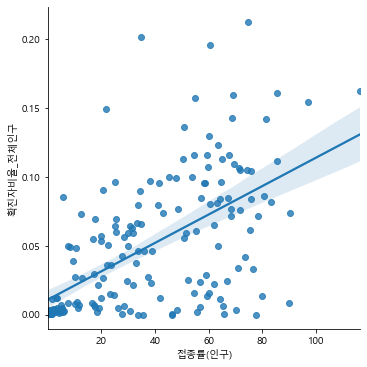

In [40]:
sns.lmplot(x='접종률(인구)', y='확진자비율_전체인구', data=df_corona_all_n)
plt.show()

### 인구당 확진자 발생 비율과 백신 접종률 상관관계 그래프 그려보기

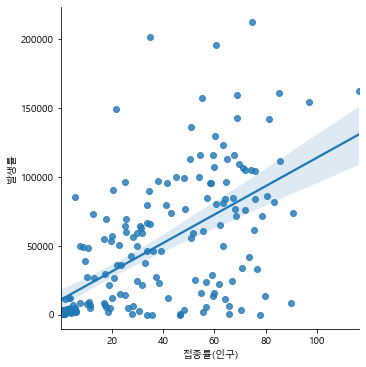

In [41]:
sns.lmplot(x='접종률(인구)', y='발생률', data=df_corona_all_n)
plt.show()

In [42]:
df_corona_all_n.corr()['접종률(인구)']['발생률']

0.5828778659099443

In [43]:
df_corona_all_n.corr()['접종률(인구)']['확진자비율_전체인구']

0.5828779400729657

### 01 현재까지의 누적된 데이터로 확인 결과 백신 접종률과 인구당 확진지 비율은 양의 상관관계를 갖는다.
### 02 현재까지의 누적된 데이터로 확인 결과 백신 접종률과 확진자 발생 비율은 양의 상관관계를 갖는다.